In [94]:
import numpy as np
from matplotlib import pyplot as plt
from os import listdir
import json

In [117]:
def get_y_val(x, xs, ys):
    for i in range(xs.shape[0]):
        if xs[i] > x:
            # This is upper bound, previous is lower bound
            if i == 0:
                end, start = xs[i], 0
                l = (x-start)/(end-start)
                return (l)*ys[i]
            end, start = xs[i], xs[i-1]
            l = (x-start)/(end-start)
            return (l)*ys[i] + (1-l)*ys[i-1]
    return ys[len(ys)-1]

In [86]:
def get_average_plot(data):
    end_time = 0
    for d in data:
        end_time = max(end_time, np.max(d[0]))
    xs = np.array(range(0, int(end_time)))
    yss = np.array([[get_y_val(x, d[0], d[1]) for x in xs] for d in data])
    ys_agv = np.sum(yss, axis=0) / yss.shape[0]
    ys_std = np.std(yss, axis=0)
    return xs, ys_agv, ys_std

def average_plot(data, color=(0.02745098, 0.50588235, 0.87058824)):
    xs, ys_avg, ys_std = get_average_plot(data)
    plt.fill_between(xs, ys_avg-ys_std, ys_avg+ys_std, color=(color[0], color[1], color[2], 0.25))
    plt.plot(xs, ys_avg, color=color)


In [133]:
def get_info(filename):
    parts = filename.replace(".json","").split("_")
    nodes = int(parts[0].split(":")[1])
    samples = int(parts[1].split(":")[1])
    return nodes, samples
    
info_dict = {}
for filename in listdir("./data"):
    nodes, samples = get_info(filename)
    key = "%s|%s"%(nodes, samples)
    with open("./data/"+filename, "r") as f:
        loaded = json.loads(f.read())
    loaded = [np.array(l) for l in loaded]
    if key in info_dict:
        info_dict[key].append(loaded)
    else:
        info_dict[key] = [loaded]

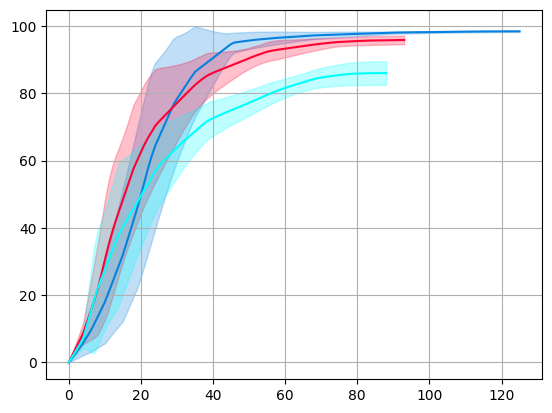

In [134]:
data_60k = []
for d in info_dict["5|60000"]:
    data_60k.extend(d)
average_plot(data_60k)

data_30k = []
for d in info_dict["5|30000"]:
    data_30k.extend(d)
#average_plot(data_30k,color=(0,1,0))

data_5k = []
for d in info_dict["5|5000"]:
    data_5k.extend(d)
average_plot(data_5k,color=(1,0,0.2))

data_500 = []
for d in info_dict["5|500"]:
    data_500.extend(d)
average_plot(data_500,color=(0,1,1))

plt.grid()
plt.show()

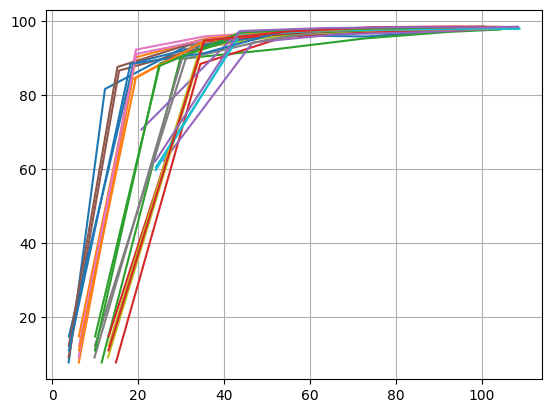

In [112]:
for n in data_30k:
    plt.plot(n[0], n[1])
plt.grid()
plt.show()